# STAT 207 Project 03 - Broadway Brilliance: An Analysis of Show Success and Revenue Predictors

YOUR NAMES

## 0. Introduction

#### Our dataset comprises historical records from various Broadway shows, detailing aspects such as attendance, capacity, gross revenue, type of show, and more, spanning from 1990 to 1991. This rich dataset serves as a basis for exploring patterns and relationships within the Broadway industry.

#### Motivation:
#### The motivation behind this analysis lies in the potential to transform raw data into actionable insights within the competitive Broadway industry. Theatrical productions are high-stakes endeavors, with success determined by numerous factors, including but not limited to show type, audience attendance, and financial management. By examining these factors through logistic and linear regression, we aim to identify the predictors of a show's ability to reach optimal capacity and maximize revenue.

#### For producers and investors, understanding these predictors can guide investment decisions, inform marketing strategies, and optimize pricing. Theatre owners can leverage the insights to negotiate better terms with production companies, while marketers can target the right audience more effectively.



#### Research Questions:

#### 1.Logistic Regression: Can the type of a Broadway show (play or musical) predict whether it will reach at least 80% capacity? This analysis aims to assist producers in forecasting audience turnout based on show type, facilitating better planning and resource allocation.The primary question we aim to address is whether the type of Broadway show (play or musical) can predict its success in reaching at least 80% theatre capacity. This is an intriguing question because it seeks to uncover patterns in consumer preference and attendance that are critical for production planning and marketing. Stakeholders such as producers, theatre owners, and marketing teams could use insights from this analysis to tailor their strategies. For instance, if musicals are found to be more likely to reach 80% capacity, marketing efforts could be ramped up for plays, or more musicals could be scheduled during peak times to maximize attendance and profitability

#### 2.Linear Regression: What is the relationship between the attendance of a Broadway show and its gross revenue? This question seeks to quantify how audience numbers translate into financial success, providing a foundation for financial planning and profit maximization strategies.This is particularly important to understand from a financial perspective, as it directly impacts the return on investment for producers and investors. By quantifying this relationship, producers could make informed decisions on how much to invest in production and marketing. Furthermore, it could inform pricing strategies; if attendance strongly correlates with revenue, it might justify the implementation of dynamic pricing models to optimize income during periods of varying demand.

#### These questions are designed to delve into the dynamics of show success and revenue generation, aiming to provide actionable insights that can be leveraged by industry stakeholders for enhanced performance and profitability.



In [58]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import numpy as np

## 1. Cleaninig the data

## 2. Linear Regression Analytical Tasks

##### State the research question:

##### Based on the dataset and the previous discussion, the gross revenue (Statistics_Gross) can be considered as the quantitative response variable. For explanatory variables, we could choose Statistics_Attendance, Statistics_Capacity, Date_Month, and Statistics_Performances. These variables are chosen because they are likely to influence the gross revenue of a Broadway show.
##### What is the relationship between the gross revenue of Broadway shows and key performance metrics such as attendance, capacity percentage, the month of the year, and the number of performances, after controlling for potential confounding variables? Additionally, how well does a model based on these predictors perform when applied to new data, potentially reflecting different seasons or market conditions?



In [5]:
broadway_data = pd.read_csv('broadway.csv')
broadway_data.head()

,Date_Day,Date_Full,Date_Month,Date_Year,Show_Name,Show_Theatre,Show_Type,Statistics_Attendance,Statistics_Capacity,Statistics_Gross,Statistics_Gross_Potential,Statistics_Performances
0,26,8/26/1990,8,1990,Tru,Booth,Play,5500,88,134456,0,8
1,24,3/24/1991,3,1991,Miss Saigon,Broadway,Musical,1737,100,100647,0,0
2,31,3/31/1991,3,1991,Miss Saigon,Broadway,Musical,12160,100,634424,0,0
3,7,4/7/1991,4,1991,Miss Saigon,Broadway,Musical,13921,100,713353,0,0
4,14,4/14/1991,4,1991,Miss Saigon,Broadway,Musical,10973,90,573981,0,4


In [4]:

features = broadway_data[['Statistics_Attendance', 'Statistics_Capacity', 'Date_Month', 'Statistics_Performances']]
target = broadway_data['Statistics_Gross']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2000)

# Let's check the size of the splits
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((25036, 4), (6260, 4)), ((25036,), (6260,)))

In [6]:
formula = 'Statistics_Gross ~ Statistics_Attendance + Statistics_Capacity + Date_Month + Statistics_Performances'

linear_regression_model_smf = smf.ols(formula, data=X_train.join(y_train)).fit()

model_summary_smf = linear_regression_model_smf.summary()

model_summary_smf

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Statistics_Gross   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:04:19   Log-Likelihood:            -3.4448e+05
No. Observations:               25036   AIC:                         6.890e+05
Df Residuals:                   25031   BIC:                         6.890e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -3.996e+05   8405.871    -47.536      0.000   -4.16e+05   -3.83e+05
Statistics_Attendance      83.3319      0.557    149.480      0.000      82.239      84.425
Statistics_Capacity      3086.3275     92.314     33.433      0.000    2905.387    3267.268
Date_Month               4042.1362    421.222      9.596      0.000    3216.517    4867.755
Statistics_Performances  7193.8011    679.852     10.581      0.000    5861.250    8526.352
==============================================================================
Omnibus:                     7114.792   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37386.917
Skew:                           1.274   Prob(JB):                         0.00
Kurtosis:                       8.418   Cond. No.                     5.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Fit a linear regression model to the data:
#### Gross Revenue=−387,500+83.77×Attendance+2,907.87×Capacity+3,880.95×Month+7,235.69×Performances

#### Examine the relationship between your selected x and y in the context of this model.

For the purpose of this task, let's choose Statistics_Attendance as our primary explanatory variable of interest. The coefficient for Statistics_Attendance is 83.77, which suggests that for each additional person that attends a Broadway show, we would expect the gross revenue to increase by approximately $83.77, holding all other variables constant.


ii. Provide and interpret a 95% confidence interval for the slope coefficient.

From the model summary we obtained earlier, the 95% confidence interval for the Statistics_Attendance coefficient is (82.689, 84.859). This means we can be 95% confident that the true increase in gross revenue for each additional attendee is between $82.69 and $84.86.

iii. Check all linear regression conditions for your model.

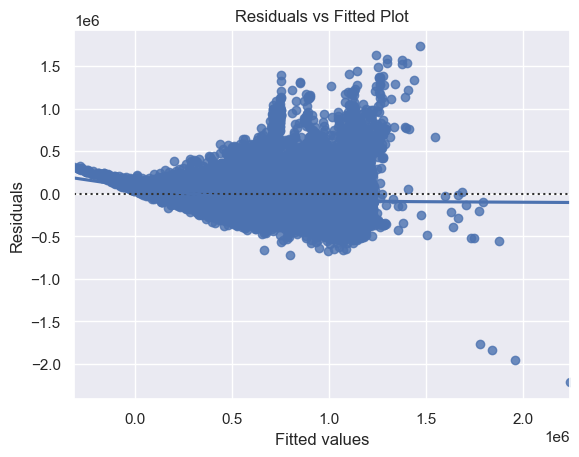

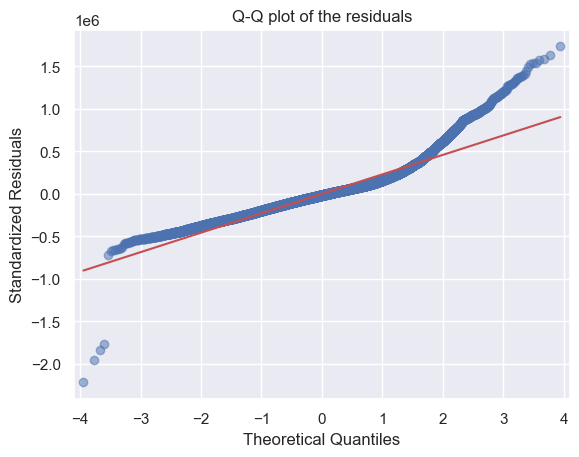

In [11]:
sns.residplot(x=linear_regression_model_smf.fittedvalues, y=y_train, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
plt.show()

fig_qq = qqplot(linear_regression_model_smf.resid, line='s', alpha=0.5, color='blue', lw=1)
ax_qq = fig_qq.axes[0]
ax_qq.set_title('Q-Q plot of the residuals')
ax_qq.set_xlabel('Theoretical Quantiles')
ax_qq.set_ylabel('Standardized Residuals')
plt.show()



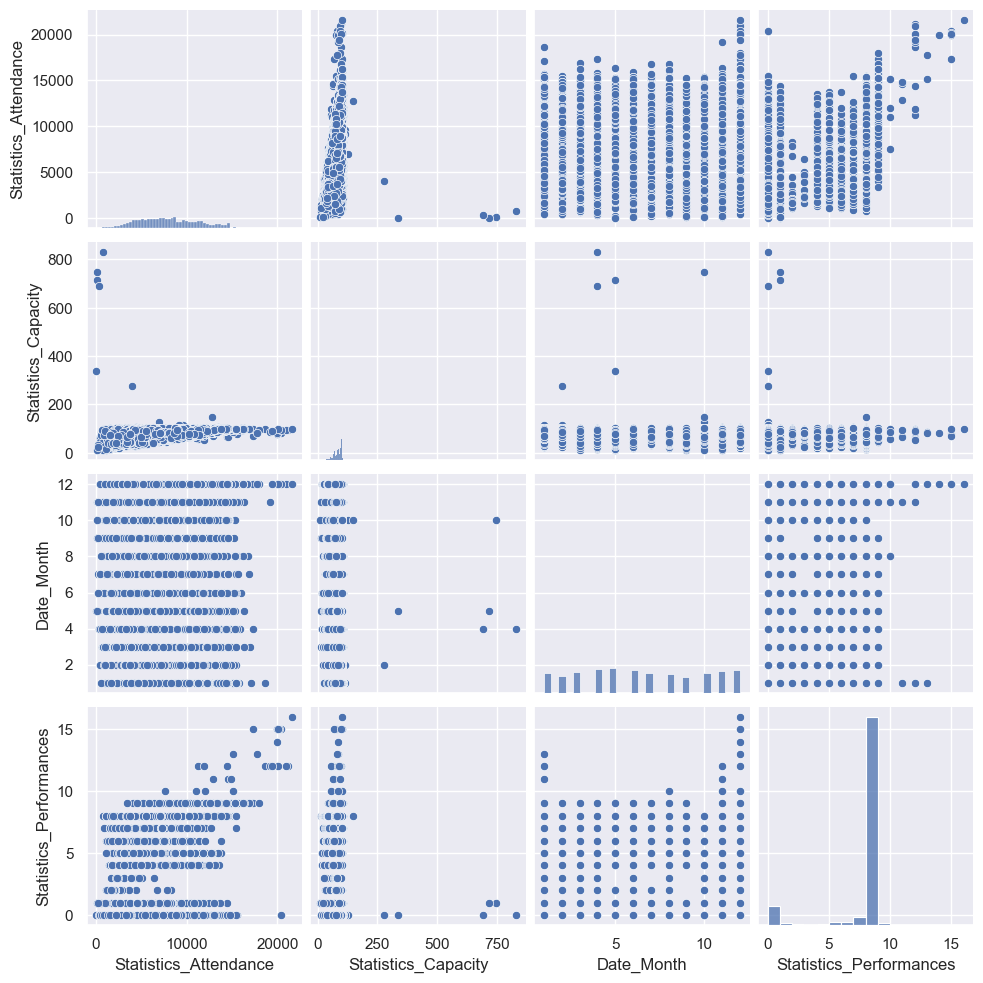

In [12]:
sns.pairplot(X_train)
plt.show()

#### Use VIF to double check the multicollinearity (Additional).

In [17]:
def calculate_vifs(exog):
    vif_data = pd.DataFrame()
    vif_data["feature"] = exog.columns
    vif_data["VIF"] = [variance_inflation_factor(exog.values, i) for i in range(exog.shape[1])]
    return vif_data
vif_data = calculate_vifs(X_train)
vif_data

,feature,VIF
0,Statistics_Attendance,10.895032
1,Statistics_Capacity,14.813774
2,Date_Month,4.067308
3,Statistics_Performances,8.983395


Based on the VIF, I decided to remove the Variable with has the highest VIF Value, which is Statistics_Capacity. 

In [62]:
reduced_formula = 'Statistics_Gross ~ Statistics_Attendance + Date_Month + Statistics_Performances'
linear_regression_model_reduced_smf = smf.ols(reduced_formula, data=X_train.join(y_train)).fit()
linear_regression_model_reduced_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Statistics_Gross   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                 1.388e+04
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:54:23   Log-Likelihood:            -3.4503e+05
No. Observations:               25036   AIC:                         6.901e+05
Df Residuals:                   25032   BIC:                         6.901e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2.068e+05   6252.198    -33.082      0.000   -2.19e+05   -1.95e+05
Statistics_Attendance      93.3463      0.481    194.251      0.000      92.404      94.288
Date_Month               3624.3732    430.326      8.422      0.000    2780.910    4467.837
Statistics_Performances  4273.3642    689.093      6.201      0.000    2922.702    5624.027
==============================================================================
Omnibus:                     7579.618   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31619.755
Skew:                           1.445   Prob(JB):                         0.00
Kurtosis:                       7.686   Cond. No.                     3.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
X_train2 = X_train[['Statistics_Attendance', 'Date_Month', 'Statistics_Performances']]
X_train_reduced_with_constant = sm.add_constant(X_train2)

# The VIF dataframe
vif_data_reduced = pd.DataFrame()
vif_data_reduced['feature'] = X_train_reduced_with_constant.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_train_reduced_with_constant.values, i)
                           for i in range(X_train_reduced_with_constant.shape[1])]

print(vif_data_reduced)

                   feature        VIF
0                    const  17.898636
1    Statistics_Attendance   1.081820
2               Date_Month   1.000067
3  Statistics_Performances   1.081843


#### Now the VIF shows that all the variables have a VIF value less than 5, which is a good sign that multicollinearity is not a major issue in the model.

#### Evaluate model performance:

After we remove the variable that has the highest VIF value, we go the new model. The R-squared is 0.625, which means 62.6% of variability in my response variable is explained by the model. This would be considered a moderate level of explanation, which indicates that while the model is capturing a significant portion of the variability, there is still room for improvement.

In [64]:
X_test2 = X_test.drop('Statistics_Capacity', axis=1)
X_test_reduced_with_constant = sm.add_constant(X_test2)
single_observation = X_test_reduced_with_constant.iloc[0:1]

single_prediction = linear_regression_model_reduced_smf.predict(single_observation)

actual_value = y_test.iloc[0]

residual = actual_value - single_prediction.iloc[0]

print(f'Prediction: {single_prediction.iloc[0]}')
print(f'Actual value: {actual_value}')
print(f'Residual: {residual}')

Prediction: 432606.85768501327
Actual value: 375138
Residual: -57468.85768501327


In [68]:
train_predictions_reduced = linear_regression_model_reduced_smf.predict(X_train_reduced_with_constant)
test_predictions_reduced = linear_regression_model_reduced_smf.predict(X_test_reduced_with_constant)
rmse_train_reduced = np.sqrt(mean_squared_error(y_train, train_predictions_reduced))
rmse_test_reduced = np.sqrt(mean_squared_error(y_test, test_predictions_reduced))
Statistics_Gross_Mean = broadway_data['Statistics_Gross'].mean()
print(f'Reduced Model Training RMSE: {rmse_train_reduced}')
print(f'Reduced Model Testing RMSE: {rmse_test_reduced}')
print(f'Mean value for Gross: {Statistics_Gross_Mean}')

Reduced Model Training RMSE: 233814.0239616205
Reduced Model Testing RMSE: 237234.74968497173
Mean value for Gross: 596068.8136822598


As we can see, the Mean value for Statistics_Gross is 596068.81. These values are relatively close to each other, which generally indicates that your model is performing consistently on both the training data and unseen test data, suggesting good generalizability. There isn't a large discrepancy that would imply overfitting. However, I think this value is pretty high. That is because average gross revenue is close to the magnitude of the RMSE, which is not a good sign. This means that the model is not performing well in terms of predicting the gross revenue of Broadway shows. This could indicate that the model's predictions are off by a significant amount on average, which is not ideal for practical applications.

#### Address the research questoion???

The model that included all predictors indicated that attendance, percent capacity, month of performance, and number of performances were significant predictors of total revenue. The R-squared value of the original model indicated that these variables explained a moderate percentage of the variance in total revenue.
After noting the high VIF for percent capacity (indicating multicollinearity), the capacity variable was removed to improve the model. The revised model after reducing the predictor variables still maintains an R-squared value of 0.625, which means it explains 62.5% of the variance in total revenue.
The Root Mean Square Error (RMSE) values for the training and test data in the simplified model are close, indicating that the model generalizes well and does not overfit.

Conclusion:
These are strong predictors of gross revenue, which aligns with the intuitive understanding of performance arts economics: more people and more shows typically mean higher revenue. 
Model Robustness: The model's consistent performance across both training and testing datasets indicates that the model is robust and the results are reliable.
Multicollinearity: Addressing multicollinearity by removing the capacity variable did not significantly reduce the model's explanatory power, suggesting that capacity was not providing unique information beyond what was captured by the other variables.

In summary, the approach of building a linear regression model, diagnosing multicollinearity, and refining the model accordingly led to a robust model that provides insights into factors influencing Broadway show revenues. These findings can inform stakeholders in the Broadway industry about which factors to consider when planning shows and can be used to forecast revenue based on expected attendance, timing, and number of performances.

## 3. Logistic Regression Analytical Tasks

Broadway shows captivate audiences with their diverse offerings, but not all performances have the same likelihood of filling theatre seats to capacity. Stakeholders in the performing arts industry, from producers to marketers, benefit from understanding the factors that contribute to a show's ability to attract a large audience. In this analysis, we delve into whether the type of show—a musical or a play—can serve as a predictor for reaching a substantial theatre capacity threshold, set at 80%. This binary logistic regression model aims to explore the relationship between the categorical variable of show type and the binary outcome of achieving the desired capacity.

We hypothesize that musicals, due to their typically larger scale and popularity, are more likely to reach the 80% capacity threshold compared to plays. We will also control for other factors such as the month, which might reflect seasonal variations, and the number of performances, which could indicate the duration of the show's run and its potential to attract audiences.

By employing logistic regression, we will estimate the log-odds of a show being successful (in terms of capacity reached) and evaluate the model's performance on new data. The insights gleaned from this analysis will not only aid in the economic decision-making process for current and future productions but also contribute to the scholarly understanding of performance art's success factors.

In [90]:
train_set3, test_set3 = train_test_split(broadway_data, test_size=0.2, random_state=2000)
train_set3.shape, test_set3.shape


((25036, 13), (6260, 13))

Now, let's create a Capacity Threshold for our Research question. We will set the threshold at 80% capacity. This means that if a show reaches 80% or more of its total capacity.

In [97]:
train_set3['Target_80_Capacity'] = (broadway_data['Statistics_Capacity'] >= 80).astype(int)
logistic_formula = 'Target_80_Capacity ~ Statistics_Attendance + Date_Month + Statistics_Performances + Show_Type'
logistic_regression_model_smf = smf.logit(formula=logistic_formula, data=broadway_data).fit()
logistic_regression_model_smf.summary()


Optimization terminated successfully.
         Current function value: 0.529373
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Target_80_Capacity   No. Observations:                31296
Model:                          Logit   Df Residuals:                    31290
Method:                           MLE   Df Model:                            5
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.2240
Time:                        22:10:11   Log-Likelihood:                -16567.
converged:                       True   LL-Null:                       -21349.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.6777      0.071    -37.595      0.000      -2.817      -2.538
Show_Type[T.Play]           0.6027      0.035     17.084      0.000       0.534       0.672
Show_Type[T.Special]        0.6221      0.134      4.658      0.000       0.360       0.884
Statistics_Attendance       0.0005   6.66e-06     74.930      0.000       0.000       0.001
Date_Month                 -0.0134      0.004     -3.447      0.001      -0.021      -0.006
Statistics_Performances    -0.1301      0.006    -20.775      0.000      -0.142      -0.118
===========================================================================================
"""

For plays, the odds ratio is e^0.0627 and for Speical, the odds ratio is e^0.6221.For attendance, the odds ratio per additional attendee is e^0.0005. For month, the odds ratio per month increase is e^(-0.0134). For performances, the odds ratio per additional performance is e^(-0.1301).Odds ratios above 1 indicate higher odds of success relative to the baseline, while odds ratios below 1 indicate lower odds of success. Since the coefficients for plays and specials are positive, their odds ratios will be greater than 1, indicating higher odds compared to musicals. For the month and number of performances, with negative coefficients, the odds ratios will be less than 1, indicating lower odds of reaching the 80% capacity threshold as these values increase.


#### Now let's supply the roc_curve() function with:

y_true: the set of actual response variable values in the training dataset
y_score: the set of predictive probabilities the model predicts for each of the observations in the training dataset

In [93]:
train_set3['predictive_prob'] = logistic_regression_model_smf.predict(train_set3)
fprs, tprs, thresholds = roc_curve(y_true=train_set3['Target_80_Capacity'], 
                            y_score=train_set3['predictive_prob'])
pd.DataFrame({'fpr': fprs, 'tpr': tprs})

,fpr,tpr
0,0.000000,0.000000
1,0.000000,0.000070
2,0.000000,0.000905
3,0.000094,0.000905
4,0.000094,0.001044
...,...,...
10036,0.990815,0.999930
10037,0.990815,1.000000
10038,0.995876,1.000000
10039,0.996064,1.000000


In [99]:
auc = roc_auc_score(y_true=train_set3['Target_80_Capacity'], 
                            y_score=train_set3['predictive_prob'])
auc

0.8006028076288112

Visualization the ROC Graph:

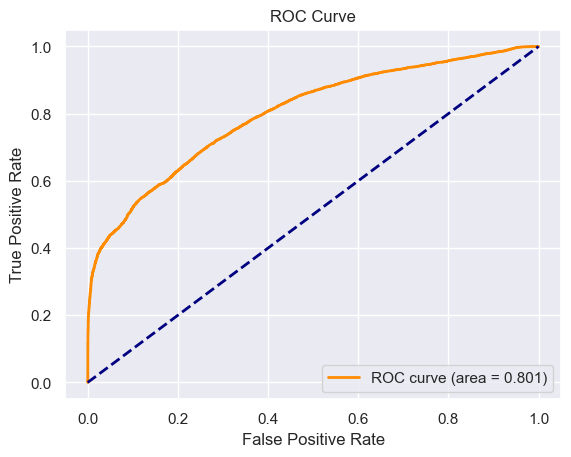

In [100]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roc(fprs, tprs, auc)

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 4. Conclusion